In [2]:
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as so
import os

In [3]:
nhead = 12
toVolt = 39.3216/((2**16) -1)
touAmp= (77/55)*toVolt

In [4]:
def  newplotVPhi0(fname):
    
    nhead = 12
    toVolt = 39.3216/((2**16) -1)
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    dat = toVolt*read_data[nhead:]
    print(dat[20:])
    xs = np.arange(len(dat))
    y=dat**2
    min_index = np.argmin(y)
    min_x = xs[min_index]
    min_y = y[min_index]
    Nav=min_x-30000
    V0 = np.mean(dat[:Nav])
    V2 = np.mean(dat[Nav+60000:])
    V=1e3*(V0-V2)
    plt.plot(xs, dat)
    print(V0,V2,V)
    plt.plot(xs, dat)
    plt.axhline(y=V0, color='r', linestyle='--', label='y = V0 ({:.2f})'.format(V0))
    plt.axhline(y=V2, color='g', linestyle='--', label='y = V2 ({:.2f})'.format(V2))
    plt.axvline(x=Nav, color='r', linestyle='--', label=r'$Nav = {:.2f}$'.format(Nav))
    plt.axvline(x=Nav+60000, color='g', linestyle='--', label=r'$Len(data)-Nav = {:.2f}$'.format(len(dat)-Nav))
    plt.title(fname)
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
def avgVPhi0(fname):
    

    nhead = 12
    toVolt = 39.3216/((2**16) -1)
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    dat = toVolt*read_data[nhead:]
    xs = np.arange(len(dat))
    y=dat**2
    min_index = np.argmin(y)
    min_x = xs[min_index]
    min_y = y[min_index]
    Nav=min_x-10000

   
      



    V0 = np.mean(dat[:Nav])
    V2 = np.mean(dat[Nav+20000:])

    A = abs(1e3*(V0-V2))
    print('V/Phi0 = %.2f mV'%(A))
    
    return A

In [6]:

def plotVdaqFFT(fname, nperseg=200e3, fs=100e3):
    Nhead = 12
    nperseg = int(0.5*fs)  # 0.5s segments
    toVolt = 39.3216 / ((2 ** 16) - 1)

    #fd = open(fname, 'rb')
    #read_data = np.fromfile(file=fd, dtype=np.int16)
    #fd.close()
    #print(read_data[:30])
    f, pxx = sig.welch(fname, fs=fs, nperseg=nperseg)
    f = f[:-1]
    ppx = 1e6 * np.sqrt(pxx[:-1])

    P10 = np.mean(ppx[np.abs(f - 10) <= 2])
    P103 = np.mean(ppx[(f >= 900) & (f <= 1100)])

    print(P10)
    #print(P103)

    plt.plot(f, ppx)
    plt.yscale("log")
    plt.xscale("log")

    #plt.axvline(x=10 - 5, color='r', linestyle='--', label=r'$x = {:.2f}$'.format(10 - 5))
    #plt.axvline(x=10, color='g', linestyle='--', label=r'$x = {:.2f}$'.format(10))
    #plt.axvline(x=900, color='r', linestyle='dotted', label=r'$x = {:.2f}$'.format(900))
    #plt.axvline(x=1100, color='g', linestyle='dotted', label=r'$x = {:.2f}$'.format(1100))

    plt.xlabel(r'$f$ [Hz]', fontsize= 16)
    plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
   

    plt.grid(True)
    

KeyError: "None of [Index(['SQUID 1 (V)_PC-SQUID_PC-SQUID', 'SQUID 1 (V)_PC-SQUID_VDAQ'], dtype='object')] are in the [columns]"

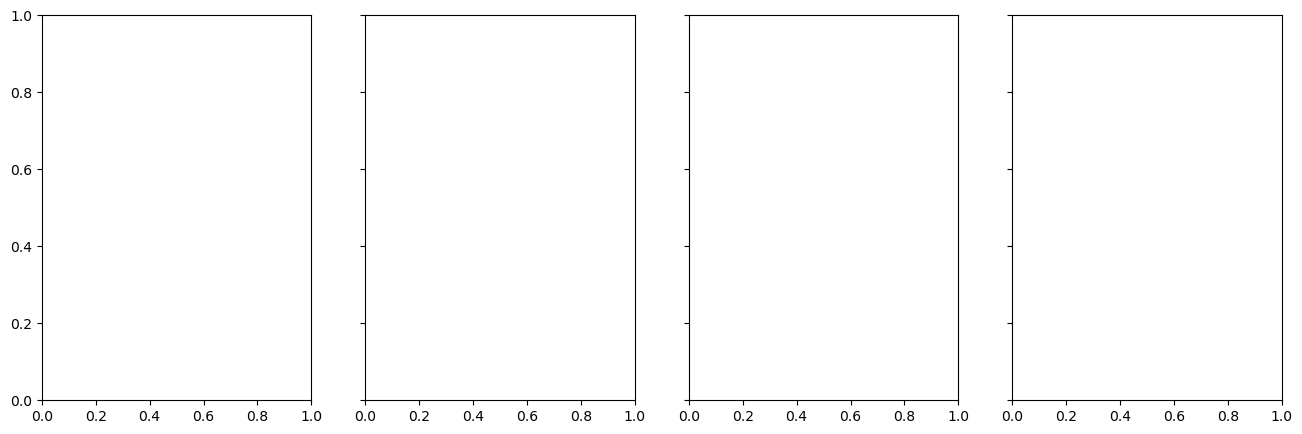

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for PC-SQUID
data_ampfc = {
    "QUAD": ["QUAD 185", "QUAD 186", "QUAD 187", "QUAD 188", "QUAD 190", "QUAD 191"],
    "SQUID 1 (V)": [4.94, 6.16, 5.039, 4.816, None, 4.737],
    "SQUID 2 (V)": [6.08, 5.61, 4.729, 4.89, None, 5.0],
    "SQUID 3 (V)": [6.28, 5.017, 4.685, 5.043, None, 5.017],
    "SQUID 4 (V)": [6.05, 4.443, 5.005, 4.421, None, 4.443]
}

# Data for VDAQ
data_ampic = {
    "QUAD": ["QUAD 185", "QUAD 186", "QUAD 190", "QUAD 191"],
    "SQUID 1 (V)": [3.9, 3.250, 4.560, 4.755],
    "SQUID 2 (V)": [4.3, 4.632, None, 4.888],
    "SQUID 3 (V)": [5.4, 3.702, 4.540, 4.286],
    "SQUID 4 (V)": [0.7, 4.209, 3.200, None]
}

# Convert dictionaries to pandas DataFrames
df_ampfc = pd.DataFrame(data_ampfc)
df_ampic = pd.DataFrame(data_ampic)

# Merge dataframes based on QUAD column
df_merged = pd.merge(df_ampfc, df_ampic, on="QUAD", suffixes=('_PC-SQUID', '_VDAQ'))

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharey=True)

for i, col in enumerate(df_merged.columns[1:]):
    ax = df_merged.plot(kind='bar', x='QUAD', y=[col+'_PC-SQUID', col+'_VDAQ'], ax=axes[i], color=['blue', 'orange'])
    ax.set_title(col)

# Labeling
fig.suptitle('Comparison of SQUIDs Peak-to-Peak Amplitudes: PC-SQUID vs VDAQ')
plt.xlabel('QUAD')
plt.ylabel('Voltage (V)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

file_path = r"C:\Users\n1cos\Downloads\NPS_file175.txt"
file_path1 = r"C:\Users\n1cos\Downloads\NPS_file180.txt"

fs = 2000  # Sampling frequency
nperseg = int(1000)  # Number of data points per segment

# Read data from the first file
df = pd.read_csv(file_path)
read_data = df.values.flatten()
f=read_data[0::2]
read_data=1e6*read_data[1::2]/1.654
# Read data from the second file
df1 = pd.read_csv(file_path1)
read_data1 = df1.values.flatten()
f1=read_data1[0::2]
read_data1=1e6*read_data1[1::2]/1.654
# Plot the results on a log-log scale
plt.figure(figsize=(10, 6))
plt.plot(f, read_data, label='NPS_file175.txt')
plt.plot(f1,read_data1, label='NPS_file180.txt')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
VA=[1.675,1.674]       
for i in range(2):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_186_"+ str(2*i+1) + "_M_noise.bin"
    #print("squidchar_noise_186" + str(i+1)+"M")
    nperseg=int(0.5*fs)
    fs=100e3
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        #P103 = np.mean(ppx[(f >= 900) & (f <= 1100)])
        print(P10)
        plt.plot(f, ppx,label=f"07SQUID_"+ str(2*i+1))
        plt.yscale("log")
        plt.xscale("log")
    else:
        print("No data taken")
VA=[1.588,1.770]#SQUIDGAIN
for i in range(2):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\squidchar_186_"+ str(2*i + 2) + "_M_noise.bin"
    #print("squidchar_noise_186" + str(i+1)+"M")
    fs=100e3
    nperseg=int(0.5*fs)
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        #P103 = np.mean(ppx[(f >= 900) & (f <= 1100)])
        print(P10)
        plt.plot(f, ppx,label=f"09SQUID_"+ str(2*i + 2))
        plt.yscale("log")
        plt.xscale("log")
    else:
        print("No data taken")        
#plt.title("QUAD 186",fontsize= 16)
#plt.axhline(y=4, color='r', linestyle='--', linewidth=4,label=" Shunt Noise")
plt.legend()
#plt.yscale("log")
#plt.xscale("log")
plt.grid(True)
plt.xlabel(r'$f$ [Hz]', fontsize= 16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
plt.show()        



In [ ]:
VA=[1.500, 1.512,1.525,1.719]
for i in range(4):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\squidchar_185_"+ str(i + 1) + "_M_noise.bin"
    #print("squidchar_noise_186" + str(i+1)+"M")
    fs=100e3
    nperseg=int(0.5*fs)
    
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        P103 = np.mean(ppx[(f >= 900) & (f <= 1100)])
        print(P10)
        plt.plot(f, ppx,label=f"SQUID_"+ str(i + 1))
        
    else:
        print("No data taken")
#plt.title("QUAD 185",fontsize= 16)
#plt.axhline(y=4, color='r', linestyle='--', linewidth=5,label=" Shunt Noise")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.xlabel(r'$f$ [Hz]', fontsize= 16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
plt.show()        

In [ ]:
VA=[1.790, 1.79,1.790,1.790]
for i in range(4):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_188_"+ str(i + 1) + "_M_noise.bin"
    #print("squidchar_noise_186" + str(i+1)+"M")
    fs=100e3
    nperseg=int(0.5*fs)
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        print(P10)
        plt.plot(f, ppx,label=f"SQUID_"+ str(i + 1))
        
    else:
        print("No data taken")
#plt.title("QUAD 188",fontsize= 16)
#plt.axhline(y=4, color='r', linestyle='--', linewidth=5,label=" Shunt Noise")
plt.legend(loc='upper right')
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.xlabel(r'$f$ [Hz]', fontsize= 16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
plt.show()        

2.6528418248348395
21.154397891861592
3.0640051790979443
2.7889736009032147


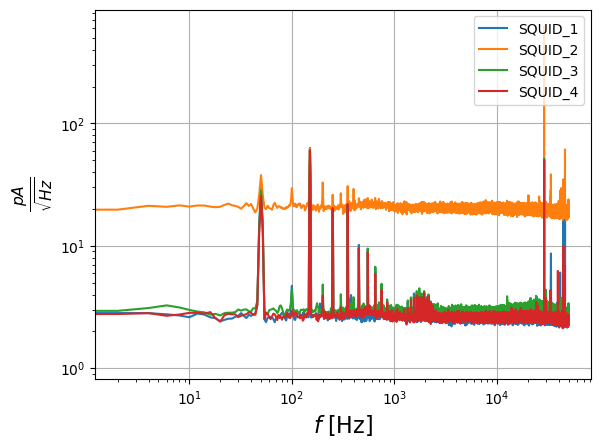

In [11]:
VA=[1.79,1.76,1.79,1.76]
for i in range(4):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_187_"+ str(i + 1) + "_M_noise.bin"
    #print("squidchar_noise_S" + str(i+1)+"M")
    #print("squidchar_noise_186" + str(i+1)+"M")
    nperseg=0.5*100e3
    fs=100e3
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        print(P10)
        plt.plot(f, ppx,label=f"SQUID_"+ str(i + 1))
        
    else:
        print("No data taken")
#plt.title("QUAD 187",fontsize= 16)
#plt.axhline(y=4, color='r', linestyle='--', linewidth=5,label=" Shunt Noise")
plt.legend(loc='upper right')
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.xlabel(r'$f$ [Hz]', fontsize= 16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
plt.show()        

150.22700920414917
258.43816116842754
5.196595389529591
7.431755873893063


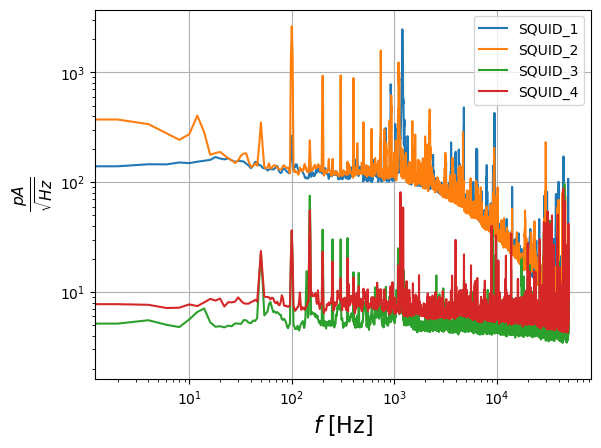

In [12]:
VA=[1.790,1.794,1.562,1.807]
for i in range(4):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_190_"+ str(i + 1) + "_M_noise.bin"
    #print("squidchar_noise_186" + str(i+1)+"M")
    nperseg=0.5*100e3
    fs=100e3
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        print(P10)
        plt.plot(f, ppx,label=f"SQUID_"+ str(i + 1))
        
    else:
        print("No data taken")
#plt.title("QUAD 190",fontsize= 16)
#plt.axhline(y=4, color='r', linestyle='--', linewidth=5,label=" Shunt Noise")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.xlabel(r'$f$ [Hz]', fontsize= 16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
plt.show()        

4.896831301707265
4.113373094102666
8.938910263733591
5.92377978818385


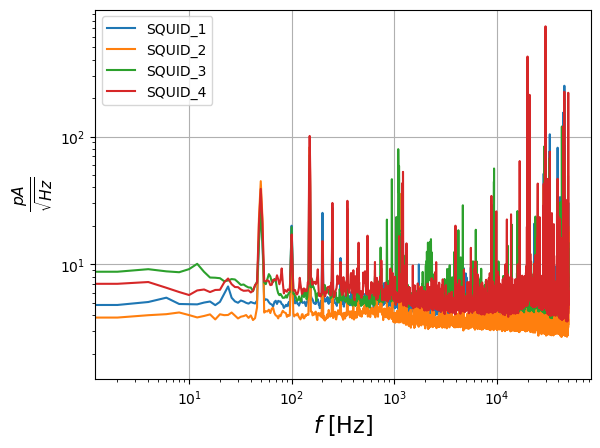

In [13]:
VA=[1.543,1.557,1.555,1.790]
for i in range(4):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_191_"+ str(i + 1) + "_M_noise.bin"
    #print("squidchar_noise_186" + str(i+1)+"M")
    nperseg=0.5*100e3
    fs=100e3
    a=VA[i]
    if os.path.isfile(file_path):
        #readRDT(file_path)
        fd = open(file_path, 'rb')
        read_data = np.fromfile(file=fd, dtype=np.int16)
        fd.close()
        read_data= toVolt*read_data[12:]/a
        f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
        f = f[:-1]
        ppx = 1e6 * np.sqrt(pxx[:-1])
        P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
        print(P10)
        plt.plot(f, ppx,label=f"SQUID_"+ str(i + 1))
        
    else:
        print("No data taken")
#plt.title("QUAD 191",fontsize= 16)
#plt.axhline(y=4, color='r', linestyle='--', linewidth=5,label=" Shunt Noise")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.xlabel(r'$f$ [Hz]', fontsize= 16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize= 16)
plt.show()        

5.260584574494636


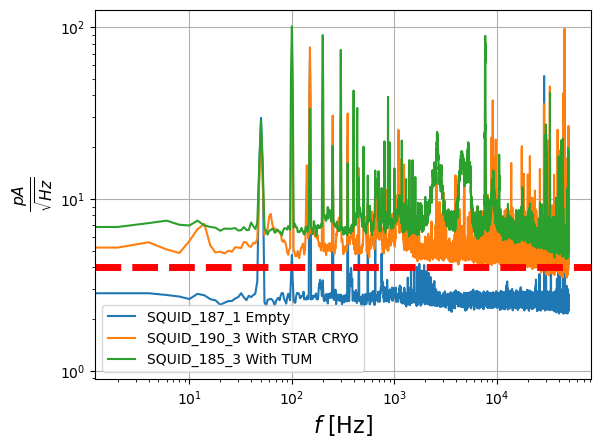

In [14]:
VA = [1.562]
file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_190_3_M_noise.bin"

a = 1.543

os.path.isfile(file_path)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()

read_data = toVolt * read_data[12:] / a

f, pxx = sig.welch(read_data, fs=fs, nperseg=nperseg)
f = f[:-1]
ppx = 1e6 * np.sqrt(pxx[:-1])

VA = 1.543
file_path1 = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_185_3_M_noise.bin"
a = 1.525
os.path.isfile(file_path1)
fd1 = open(file_path1, 'rb')
read_data = np.fromfile(file=fd1, dtype=np.int16)
fd1.close()
read_data = toVolt * read_data[12:] / a
f1, pxx1 = sig.welch(read_data, fs=fs, nperseg=nperseg)
f1=f1[:-1]
ppx1 = 1e6 * np.sqrt(pxx1[:-1])

file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_187_1_M_noise.bin"
a = 1.79
os.path.isfile(file_path)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data = toVolt * read_data[12:] / a
f2, pxx2 = sig.welch(read_data, fs=fs, nperseg=nperseg)
f2=f2[:-1]
ppx2 = 1e6 * np.sqrt(pxx2[:-1])

P10 = np.mean(ppx[(f >= 7) & (f <= 11)])
print(P10)

plt.plot(f2, ppx2, label="SQUID_187_1 Empty")
plt.plot(f, ppx, label="SQUID_190_3 With STAR CRYO")
plt.plot(f1, ppx1, label="SQUID_185_3 With TUM")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.axhline(y=4, color='r', linestyle='--', linewidth=5,label=" Shunt Noise")
plt.xlabel(r'$f$ [Hz]', fontsize=16)
plt.ylabel(r'$ \frac{p A}{\sqrt{Hz}}$', fontsize=16)
plt.show()


[-0.64320981 -0.6360097  -0.64440983 ...  0.34560527  0.34920533
  0.34500526]
-0.6385594210738673 0.34673183520517104 -985.2912562790384


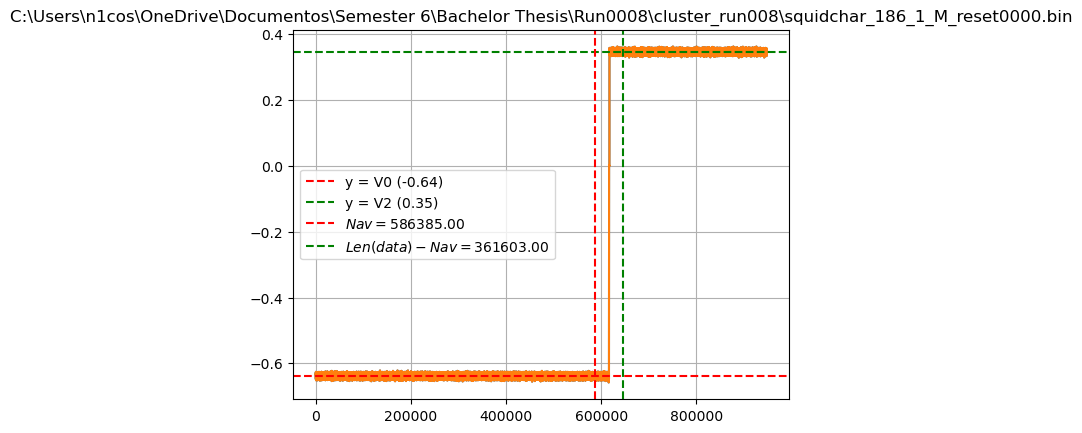

V/Phi0 = 985.29 mV
[ 0.66481014  0.66661017  0.66421014 ... -0.30480465 -0.30060459
 -0.30960472]
0.6642352869107863 -0.30413312336133647 968.3684102721227


C:\Users\n1cos\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


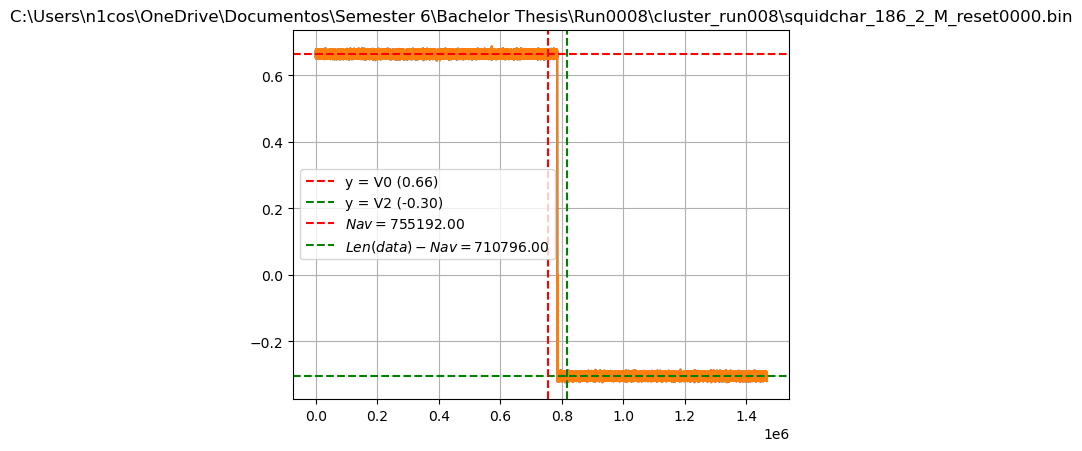

V/Phi0 = 968.37 mV
[ 0.65941006  0.65581001  0.65881005 ... -0.33660514 -0.33300508
 -0.33600513]
0.6596192213651565 -0.3257514792660897 985.3707006312462


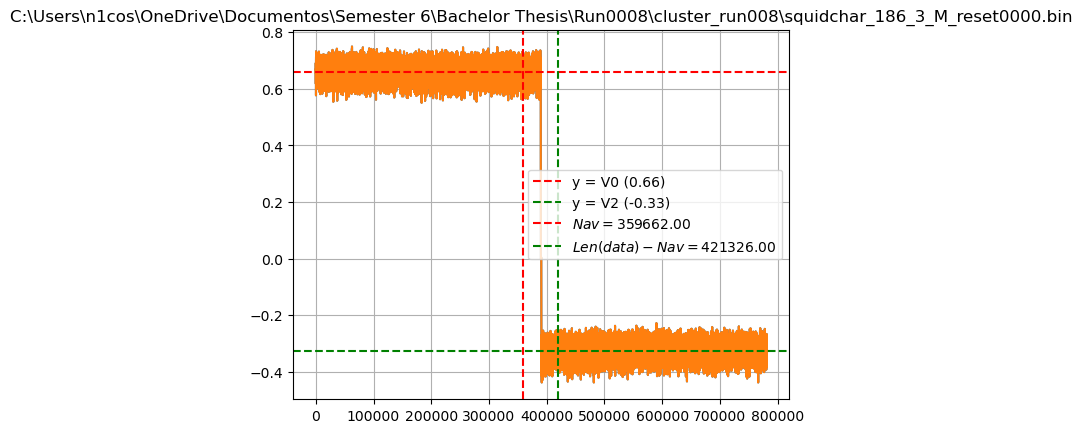

V/Phi0 = 985.50 mV
[ 0.61800943  0.60840928  0.61080932 ... -0.36840562 -0.36660559
 -0.36960564]
0.6118574375850264 -0.37233716324088817 984.1946008259146


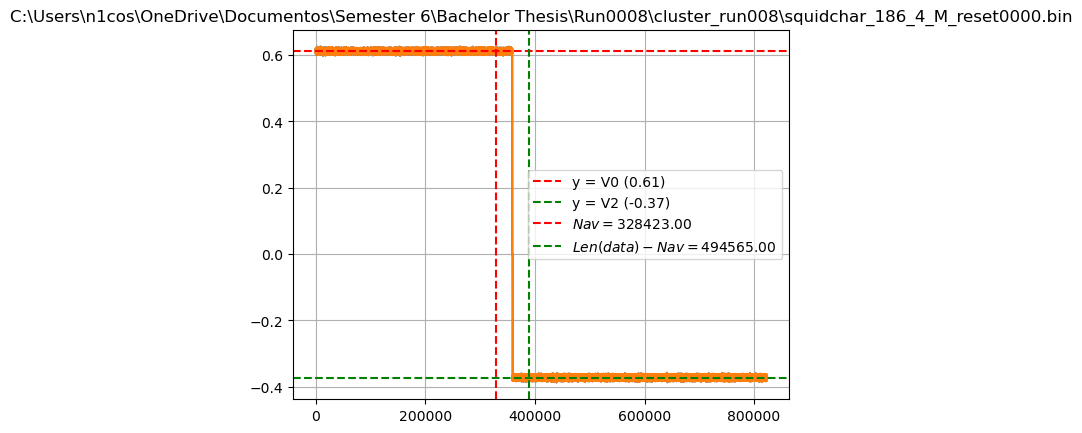

V/Phi0 = 984.19 mV


In [8]:
for i in range(4):
    file_path =r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_186_" + str(i+1)+"_M_reset0000.bin"
    if os.path.isfile(file_path):
        #readRDT(file_path)
        newplotVPhi0(file_path)
        avgVPhi0(file_path)
        
        
    
    else:
        print("No data taken")

[ 0.62460953  0.6228095   0.63420968 ... -0.34920533 -0.3342051
 -0.33960518]
0.6269412996609447 -0.3690059196205335 995.9472192814782


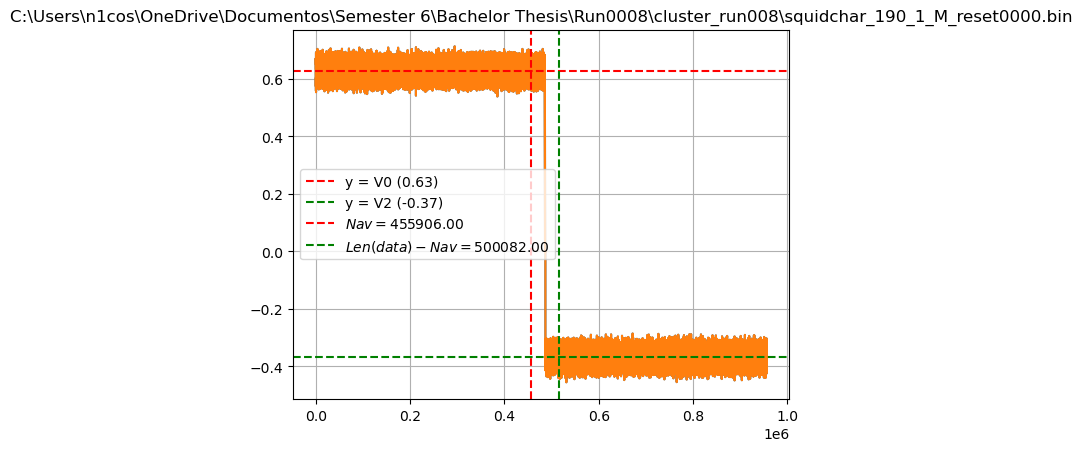

[ 0.64740988  0.65641002  0.63180964 ... -0.32340493 -0.31140475
 -0.29400449]
0.6687470722565004 -0.30361519617023 972.3622684267303


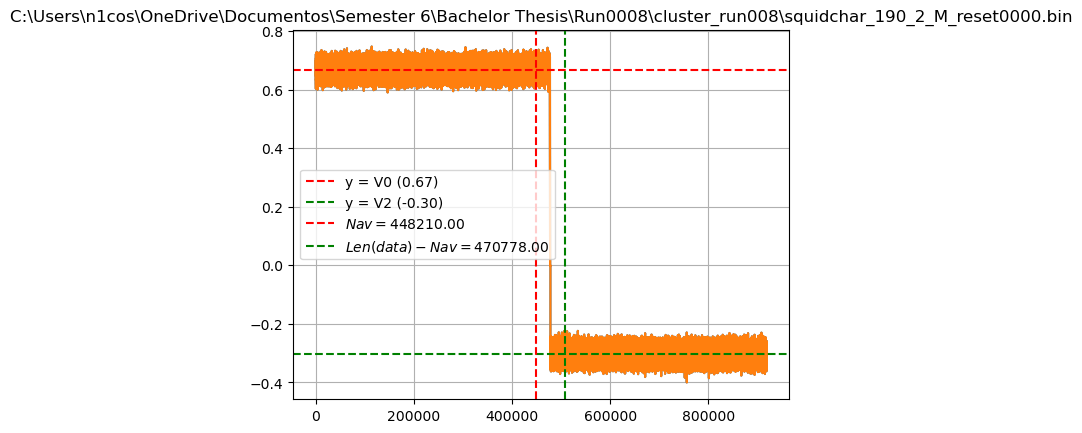

[ 0.61440938  0.61500938  0.61500938 ... -0.36300554 -0.36180552
 -0.36480557]
0.6145246585516432 -0.3625730868384215 977.0977453900647


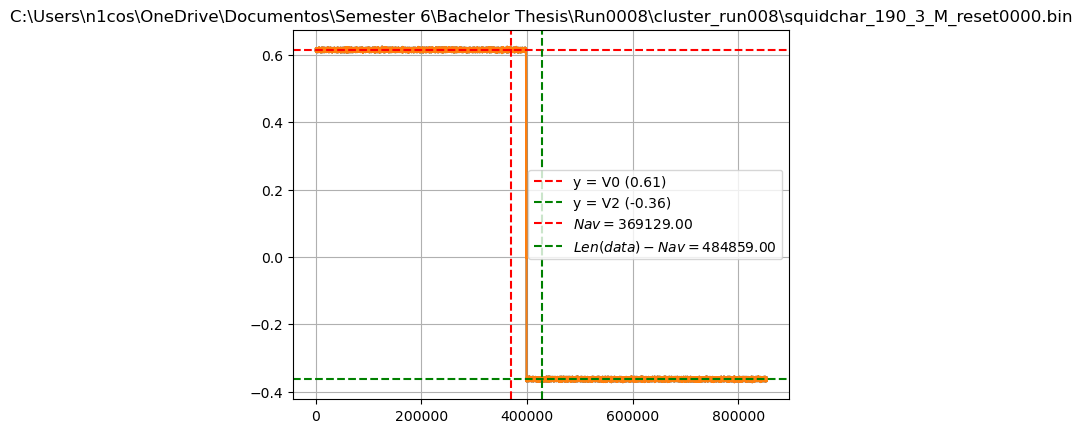

[ 0.55860852  0.55920853  0.55740851 ... -0.42960656 -0.42480648
 -0.42360646]
0.559375169086138 -0.4238491103578628 983.2242794440009


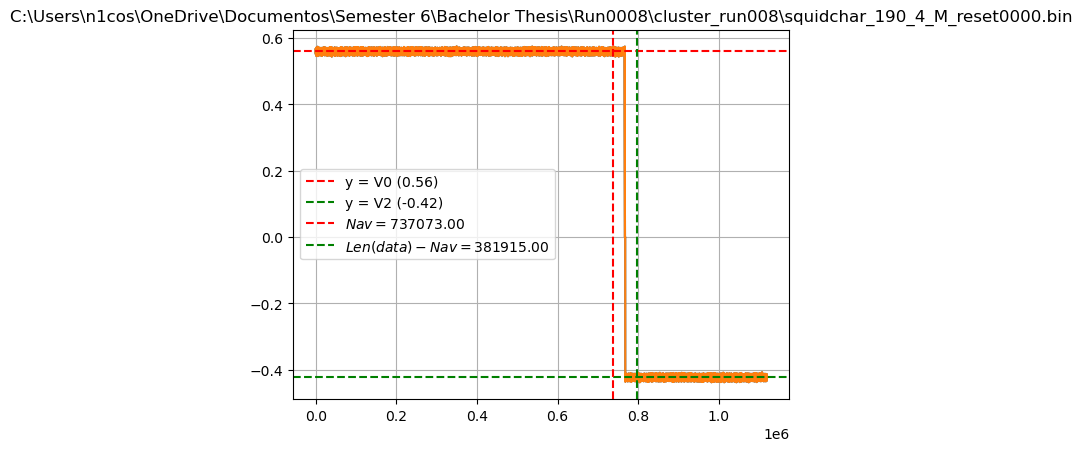

In [9]:
for i in range(4):
    file_path =r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_190_" + str(i+1)+"_M_reset0000.bin"
    if os.path.isfile(file_path):
        #readRDT(file_path)
        newplotVPhi0(file_path)
        
        
    
    else:
        print("No data taken")

In [ ]:
for i in range(4):
    file_path =r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\squidchar_187_"+ str(i+1)+"_M_reset0000.bin"
    if os.path.isfile(file_path):
        #readRDT(file_path)
        newplotVPhi0(file_path)
        
        
    
    else:
        print("No data taken")

In [ ]:
for i in range(4):
    file_path =r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\squidchar_188_"+ str(i+1)+"_M_reset0000.bin"
    if os.path.isfile(file_path):
        #readRDT(file_path)
        newplotVPhi0(file_path)
        
        
    
    else:
        print("No data taken")

In [ ]:
for i in range(4):
    file_path =r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_191_" + str(i+1)+"_M_reset0000.bin"
    if os.path.isfile(file_path):
        #readRDT(file_path)
        newplotVPhi0(file_path)
        
        
    
    else:
        print("No data taken")

In [17]:
def  newplotVPhi0(fname):
    
    nhead = 12
    toVolt = 39.3216/((2**16) -1)
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    dat = toVolt*read_data[nhead:850000]
    print(dat[20:])
    xs = np.arange(len(dat))
    y=dat**2
    min_index = np.argmin(y)
    min_x = xs[min_index]
    min_y = y[min_index]
    Nav=min_x-30000
    V0 = np.mean(dat[:Nav])
    V2 = np.mean(dat[Nav+65000:750000])
    V=1e3*(V0-V2)
    plt.plot(xs, dat)
    print(V0,V2,V)
    plt.plot(xs, dat)
    plt.axhline(y=V0, color='r', linestyle='--', label='y = V0 ({:.2f})'.format(V0))
    plt.axhline(y=V2, color='g', linestyle='--', label='y = V2 ({:.2f})'.format(V2))
    plt.axvline(x=Nav, color='r', linestyle='--', label=r'$Nav = {:.2f}$'.format(Nav))
    plt.axvline(x=Nav+65000, color='g', linestyle='--', label=r'$Len(data)-Nav = {:.2f}$'.format(len(dat)-Nav))
    plt.title(fname)
    plt.legend()
    plt.grid(True)
    plt.show()


[ 0.64560985  0.64560985  0.64440983 ... -0.3342051  -0.33360509
 -0.33540512]
0.6458815927566111 -0.33356450780204094 979.446100558652


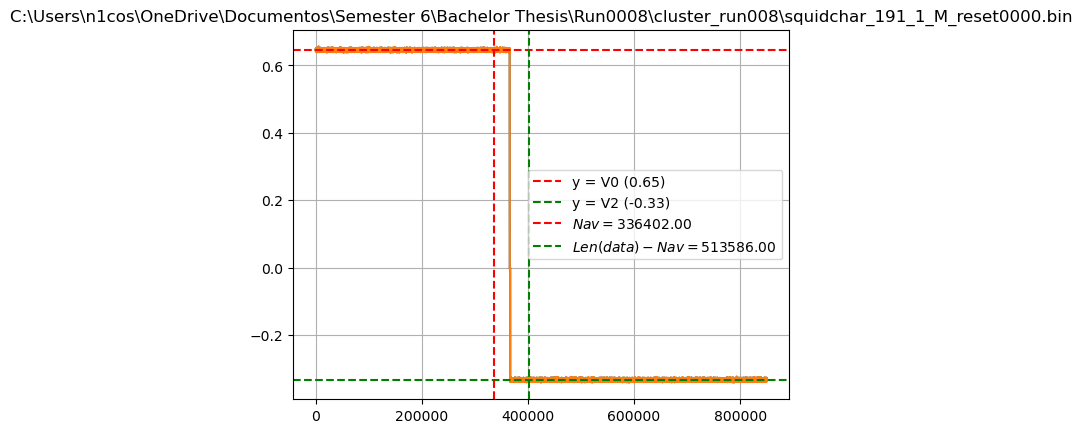

In [18]:
file_path =r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Run0008\cluster_run008\squidchar_191_1_M_reset0000.bin"
newplotVPhi0(file_path)

[2.09523197 2.09463196 2.09283193 ... 0.53520817 0.53580818 0.54660834]


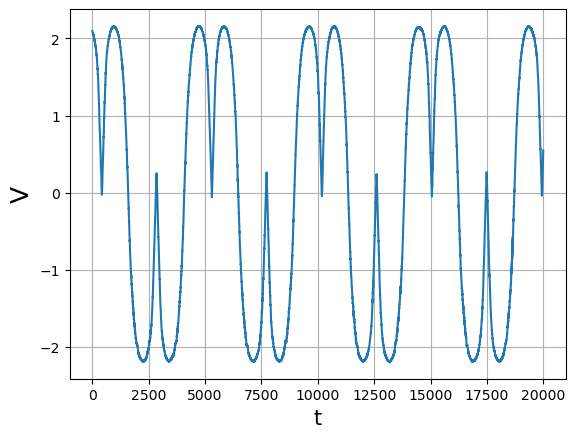

In [19]:
file_string=(r"C:\Users\n1cos\Downloads\vdaq02_livedata1.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:20000]
dat1 = dat[0:20000]
print(dat1)
Nav = 9000
plt.plot(x, dat1)
plt.grid(True)
plt.xlabel('t', fontsize= 15)
plt.ylabel('V', fontsize= 18)
plt.show()
plt.show()

[-0.00960015 -0.01020016 -0.00840013 ... -0.01020016 -0.01080016
 -0.01020016]


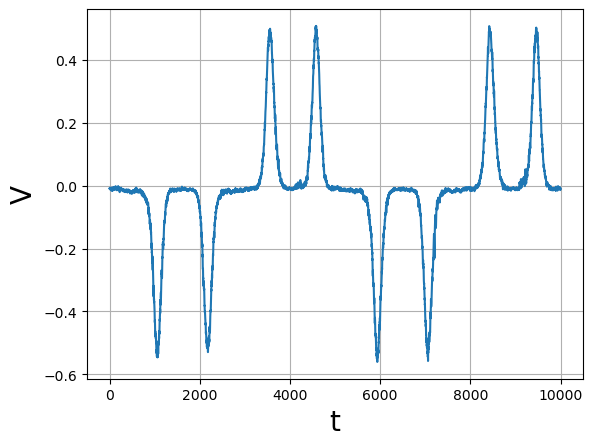

In [20]:
file_string=(r"C:\Users\n1cos\Downloads\vdaq02_livedata.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:10000]
dat1 = dat[0:10000]
print(dat1)
Nav = 9000
plt.plot(x, dat1)
plt.xlabel('t', fontsize= 20)
plt.ylabel('V', fontsize= 20)
plt.grid(True)
plt.show()

In [ ]:
file_string=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\vdaq02_livedatamin.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:7000]
dat1 = dat[0:7000]
print(dat1)
Nav = 9000
plt.plot(x, dat1)
plt.xlabel('t', fontsize= 20)
plt.ylabel('V', fontsize= 20)
plt.grid(True)
plt.show()

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_185_4_M_noise.bin"
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data= toVolt*read_data[12:]/1.525
plotVdaqFFT(read_data)

In [ ]:
file_string=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\vdaq02_livedatamax.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:16000]
dat1 = dat[0:16000]
print(dat1)
Nav = 9000
plt.plot(x, dat1)
plt.xlabel('t', fontsize= 15)
plt.ylabel('V', fontsize= 18)
plt.grid(True)
plt.show()

In [ ]:
file_string=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\vdaq02_livedata.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:8000]
dat1 = dat[0:8000]
print(dat1)
Nav = 9000
plt.plot(x, dat1)
plt.xlabel('t', fontsize= 20)
plt.ylabel('V', fontsize= 20)
plt.grid(True)
plt.show()

In [ ]:
file_string=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\vdaq02_livedata11.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:16000]
dat1 = dat[0:16000]
print(dat1)
Nav = 9000
plt.plot(x, dat1)
plt.xlabel('t', fontsize= 20)
plt.ylabel('V', fontsize= 20)
plt.grid(True)
plt.show()

In [ ]:
file_string=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\cluster009\squidchar_186_1_M_noise.bin")
file_path = os.path.normpath(file_string)
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
fd.close()
dat = toVolt*read_data[nhead:]
xs = np.arange(len(dat))
x = xs[0:4000]
dat1 = dat[0:4000]
Nav = 9000
plt.plot(x, dat1)
plt.xlabel('t', fontsize= 20)
plt.ylabel('V', fontsize= 20)
plt.grid(True)
plt.show()


In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_186_3_M_noise.bin"
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data= toVolt*read_data[12:]/1.674
plotVdaqFFT(read_data)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_186_4_M_noise.bin"
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data= toVolt*read_data[12:]/1.770
plotVdaqFFT(read_data)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_191_3_M_noise.bin"
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data= toVolt*read_data[12:]/1.555
plotVdaqFFT(read_data)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_190_1_M_noise.bin"
plotVdaqFFT(file_path)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_190_2_M_noise.bin"
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data= toVolt*read_data[12:]/1.764
plotVdaqFFT(read_data)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_190_1_M_noise (1).bin"
plotVdaqFFT(file_path)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_188_4_M_noise.bin"
plotVdaqFFT(file_path)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_190_2_M_noise (1).bin"
fd = open(file_path, 'rb')
read_data = np.fromfile(file=fd, dtype=np.int16)
fd.close()
read_data= toVolt*read_data[12:]/1.764
plotVdaqFFT(read_data)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_188_4_M_noise (1).bin"
plotVdaqFFT(file_path)

In [ ]:
file_path = r"C:\Users\n1cos\Downloads\squidchar_188_3_M_noise.bin"
plotVdaqFFT(file_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function for the given equation
def squid_voltage_current(I, R, I_Jc):
    return np.sign(I) * R * np.sqrt(np.maximum(0, I**2 - 2 * I_Jc**2))

# Load data from the file paths
def load_data(file_path):
    fd = open(file_path, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)
    fd.close()
    return read_data

# Set parameters for the initial guess
initial_guess = [30, 100]  # Initial values for R and I_Jc

# Loop over the files and fit the data
for i in range(4):
    file_path = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Temp_Strom\I\C16"+str(4+i)+",K00000.txt"
    x = load_data(file_path)

    # Assuming y is also loaded from another file, update the file path accordingly
    file_path1 = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Temp_Strom\U\C26"+ str(4+i)+ ",K00000.txt"
    y = load_data(file_path1)
    
    y = np.interp(np.linspace(0, 1, len(x)), np.linspace(0, 1, len(y)), y)

    # Perform the fit
    params, covariance = curve_fit(squid_voltage_current, x, y, p0=initial_guess)
    # Perform the fit
    params, covariance = curve_fit(squid_voltage_current, x, y, p0=initial_guess)

    # Generate fitted curve
    I_values_fit = np.linspace(min(x), max(x), 1000)
    V_values_fit = squid_voltage_current(I_values_fit, *params)

    # Plot the data and the fitted curve
    plt.scatter(x, y, label=f'Data {i+1}')
    plt.plot(I_values_fit, V_values_fit, label=f'Fit {i+1}')

plt.xlabel('Current (I)')
plt.ylabel('Voltage (V)')
plt.title('DC-SQUID Voltage-Current Characteristics with Fit')
plt.legend()
plt.grid(True)
plt.show()



   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the table data
data = {
    '': ['QUAD 185', 'QUAD 185', 'QUAD 186', 'QUAD 186'],
    'SQUID 1 (V)': [3.9, 3.250, None, 4.755],
    "SQUID 1 (V)": [3.9, 3.250, None, 4.755],
    "SQUID 2 (V)": [4.3, 4.632, None, 4.888],
    'SQUID 2 (V)': [4.3, 4.632, None, 4.888],
   
}

df = pd.DataFrame(data)
df.set_index('', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6), width=0.8)
#plt.title('SQUIDs Peak-to-Peak Amplitude', fontsize=20)
#plt.xlabel('QUAD',fontsize=20)
plt.ylabel('Amplitude (V)',fontsize=20)
plt.xticks(rotation=45, ha='right',fontsize=20)

# Show values on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Data from Table SLWRIC
slwric_data = {
    'QUAD': ['QUAD 185', 'QUAD 186', 'QUAD 190', 'QUAD 191'],
    'SQUID 1': [19.0, 14.54, None, 16.0],
    'SQUID 2': [6.1, 31.55, None, 11.0],
    'SQUID 3': [18.8, 24.34, 11.2, 11.9],
    'SQUID 4': [6.1, 26.22, 16.0, None]
}

# Data from Table AMPIC
ampic_data = {
    'QUAD': ['QUAD 185', 'QUAD 186', 'QUAD 190', 'QUAD 191'],
    'SQUID 1': [None, None, None, None],
    'SQUID 2': [4.3, 4.632, None, None],
    'SQUID 3': [5.40, None, 4.540 , None],
    'SQUID 4': [None, None, None, None]
}

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each QUAD
for quad in slwric_data['QUAD']:
    x_values = []
    y_values = []
    squid_numbers = []
    for i, squid in enumerate(['SQUID 1', 'SQUID 2', 'SQUID 3', 'SQUID 4']):
        if slwric_data[squid][slwric_data['QUAD'].index(quad)] is not None and ampic_data[squid][ampic_data['QUAD'].index(quad)] is not None:
            x_values.append(ampic_data[squid][ampic_data['QUAD'].index(quad)])
            y_values.append(slwric_data[squid][slwric_data['QUAD'].index(quad)])
            squid_numbers.append(squid.split()[-1])
    plt.scatter(x_values, y_values, marker='o', label=quad, s=100)
    
    # Annotate each point with the SQUID number
    for x, y, squid_number in zip(x_values, y_values, squid_numbers):
        plt.annotate(squid_number, (x, y), textcoords="offset points", xytext=(5,5), ha='center')

# Add labels and legend
plt.xlabel('SQUID Peak-to-Peak Amplitude (V)')
plt.ylabel('SQUID Slew Rate (mA/s)')
plt.title('SQUID Slew Rate vs. Peak-to-Peak Amplitude')
plt.legend(title='QUAD')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Data from Table SLWRIC
slwric_data = {
    'QUAD': ['QUAD 185', 'QUAD 186', 'QUAD 190', 'QUAD 191'],
    'SQUID 1': [19.0, 14.54, None, 16.0],
    'SQUID 2': [6.1, 31.55, None, 11.0],
    'SQUID 3': [18.8, 24.34, 11.2, 11.9],
    'SQUID 4': [6.1, 26.22, 16.0, None]
}

# Data from Table AMPIC
ampic_data = {
        'QUAD': ['QUAD 185', 'QUAD 186', 'QUAD 190', 'QUAD 191'],
    'SQUID 1': [3.9, 3.25, None, 4.755],
    'SQUID 2': [4.3, 4.632, None, 4.888],
    'SQUID 3': [5.4, 3.702, 4.54, 4.286],
    'SQUID 4': [0.7, 4.209, 3.2, None]
}
# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each QUAD
for quad in slwric_data['QUAD']:
    x_values = []
    y_values = []
    squid_numbers = []
    for i, squid in enumerate(['SQUID 1', 'SQUID 2', 'SQUID 3', 'SQUID 4']):
        if slwric_data[squid][slwric_data['QUAD'].index(quad)] is not None and ampic_data[squid][ampic_data['QUAD'].index(quad)] is not None:
            x_values.append(ampic_data[squid][ampic_data['QUAD'].index(quad)])
            y_values.append(slwric_data[squid][slwric_data['QUAD'].index(quad)])
            squid_numbers.append(squid.split()[-1])
    plt.scatter(x_values, y_values, marker='o', label=quad, s=100)
    
    # Annotate each point with the SQUID number
    for x, y, squid_number in zip(x_values, y_values, squid_numbers):
        plt.annotate(squid_number, (x, y), textcoords="offset points", xytext=(5,5), ha='center')

# Add labels and legend
plt.xlabel('SQUID Peak-to-Peak Amplitude (V)')
plt.ylabel('SQUID Slew Rate (mA/s)')
plt.title('SQUID Slew Rate vs. Peak-to-Peak Amplitude')
plt.legend(title='QUAD')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    'QUAD': ['QUAD 185-F', 'QUAD 185-I', 'QUAD 186-F', 'QUAD 186-I'],
    'SQUID 1 (V)': [4.94, 3.9, 6.16, 3.25],
    'SQUID 2 (V)': [6.08, 4.3, 5.61, 4.632],
    'SQUID 3 (V)': [6.28, 5.4, 5.017, 3.702],
    'SQUID 4 (V)': [6.05, 0.7, 4.443, 4.209]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
df.plot(x='QUAD', kind='bar', figsize=(10, 6))
plt.grid(True)
plt.ylabel('Amplitude (V)', fontsize=16)
plt.xticks(rotation=45, fontsize=20)
plt.legend(title='SQUID')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    'QUAD': ['QUAD 190-F', 'QUAD 190-I', 'QUAD 191-F', 'QUAD 191-I'],
    'SQUID 1 (V)': [0.27,None, 4.737, 4.755],
    'SQUID 2 (V)': [0.232,None,5.0, 4.88],
    'SQUID 3 (V)': [4.743,4.56, 5.017, 4.286],
    'SQUID 4 (V)': [2.25,3.2, 4.443, None]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
df.plot(x='QUAD', kind='bar', figsize=(10, 6))
plt.xlabel('')
plt.ylabel('Amplitude (V)', fontsize=16)
plt.xticks(rotation=45, fontsize=20)
plt.legend(title='SQUID')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    'QUAD': ['QUAD 187', 'QUAD 188'],
    'SQUID 1 (V)': [5.039,4.816],
    'SQUID 2 (V)': [4.729,4.89],
    'SQUID 3 (V)': [4.685,5.043],
    'SQUID 4 (V)': [5.005,4.421]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
df.plot(x='QUAD', kind='bar', figsize=(10, 6))
plt.xlabel('')
plt.ylabel('Amplitude (V)', fontsize=16)
plt.xticks(rotation=45, fontsize=20)
plt.legend(title='SQUID')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from Table 1 (y-values)
y_data = [
    [14.13, 5.301, None, 6.596],
    [15.54, None, None, 26.58],
    [None, None, 19.28, 13.74],
    [23.11, 20.22, 19.74, None]
]

# Data from Table 2 (x-values)
x_data = [
    [19.0, 6.1, None, 6.1],
    [14.54, None, None, 26.22],
    [None, None, 11.2, 16.0],
    [16.0, 11.0, 11.9, None]
]

# Flatten lists
x_values = [value for row in x_data for value in row if value is not None]
y_values = [value for row in y_data for value in row if value is not None]

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot of the function f(x) = x
x_range = np.linspace(min(x_values), max(x_values), 100)  # Generating x values for the function plot
plt.plot(x_range, x_range, color='red', label='$f(x) = x$')

plt.title('Scatter Plot with Function $f(x) = x$')
plt.xlabel('SQUID Slew Rate measured with through the Input Coil $(\frac{mA}{s})$')
plt.ylabel('SQUID Slew Rate determined from Feedback Coil $(\frac{mA}{s})$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data from Table 1
slew_rates = {
    'QUAD 185': [14.13, 15.54, None, 26.34],
    'QUAD 186': [5.301, 25.57, 15.36, 26.08],
    'QUAD 187': [None, 27.07, 23.34, 25.93],
    'QUAD 188': [6.596, 26.58, 27.57, 27.03],
    'QUAD 190': [None, None, 19.28, 13.74],
    'QUAD 191': [23.11, 20.22, 19.74, None]
}

# Data from Table 2
noise_values = {
    'QUAD 185': [133.50, 8.6462, 7.0264, 98.251],
    'QUAD 186': [125.73, 15.381, 100.79, 6.7787],
    'QUAD 187': [2.6528, 20.684, 3.0469, 2.7269],
    'QUAD 188': [2.8659, 3.1243, 2.9782, 50.882],
    'QUAD 190': [150.22, 262.83, 5.1965, 7.4317],
    'QUAD 191': [4.8968, 4.1133, 8.9389, 5.9237]
}

# Plotting
plt.figure(figsize=(10, 6))

for quad, slew_rate in slew_rates.items():
    noise = noise_values[quad]
    plt.scatter(noise, slew_rate, label=quad)

plt.xlabel('Noise (pA/√Hz)')
plt.ylabel('Slew Rate (mA/s)')
plt.title('Slew Rate vs Noise for Different QUADs and SQUIDs')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Data from Table 1 (Slew Rates)
slew_rates = {
    'QUAD 185': [14.13, 15.54, None, 26.34],
    'QUAD 186': [5.301, 25.57, 15.36, 26.08],
    'QUAD 187': [None, 27.07, 23.34, 25.93],
    'QUAD 188': [6.596, 26.58, 27.57, 27.03],
    'QUAD 191': [23.11, 20.22, 19.74, None]
}

# Data from Table 2 (Noise Values)
noise_values = {
    'QUAD 185': [4.94, 6.08, 6.28, 6.05],
    'QUAD 186': [6.16, 5.61, 5.017, 4.443],
    'QUAD 187': [5.039, 4.729, 4.685, 5.005],
    'QUAD 188': [4.816, 4.89, 5.043, 4.421],
    'QUAD 191': [4.737, 5.000, 5.017, 4.443]
}

# Plotting
plt.figure(figsize=(10, 6))

for quad, slew_rate in slew_rates.items():
    noise = noise_values[quad]
    plt.scatter(noise, slew_rate, label=quad)

plt.xlabel('Noise (pA/√Hz)')
plt.ylabel('Slew Rate (mA/s)')
plt.title('Slew Rate vs Noise for Different QUADs and SQUIDs')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
